In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='d2coding')

In [2]:
poker_df = pd.read_csv(r'C:\Users\user\Documents\GitHub\poker-game-data-analysis\포커 기록지.csv', index_col=0)

In [3]:
poker_df = poker_df.loc[:, ~poker_df.columns.str.startswith('Unnamed')][poker_df.index.str.contains('2024-02-28')]

In [4]:
poker_df

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
2024-02-28-01,-5400,NaN,-15000.0,NaN,15400.0,5000.0,NaN,NaN
2024-02-28-02,12000,NaN,8000.0,NaN,-15000.0,-5000.0,NaN,NaN
2024-02-28-03,3900,NaN,7600.0,NaN,4500.0,-15000.0,NaN,NaN


In [5]:
poker_df.describe()

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
count,3.00000,0.0,3.000000,0.0,3.000000,3.0,0.0,0.0
mean,3500.00000,NaN,200.000000,NaN,1633.333333,-5000.0,NaN,NaN
std,8706.89382,NaN,13165.105393,NaN,15401.406862,10000.0,NaN,NaN
min,-5400.00000,NaN,-15000.000000,NaN,-15000.000000,-15000.0,NaN,NaN
25%,-750.00000,NaN,-3700.000000,NaN,-5250.000000,-10000.0,NaN,NaN
50%,3900.00000,NaN,7600.000000,NaN,4500.000000,-5000.0,NaN,NaN
75%,7950.00000,NaN,7800.000000,NaN,9950.000000,0.0,NaN,NaN
max,12000.00000,NaN,8000.000000,NaN,15400.000000,5000.0,NaN,NaN


In [6]:
pd.DataFrame(poker_df.sum(), columns=["누적 수익"]).T

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
누적 수익,10500.0,0.0,600.0,0.0,4900.0,-15000.0,0.0,0.0


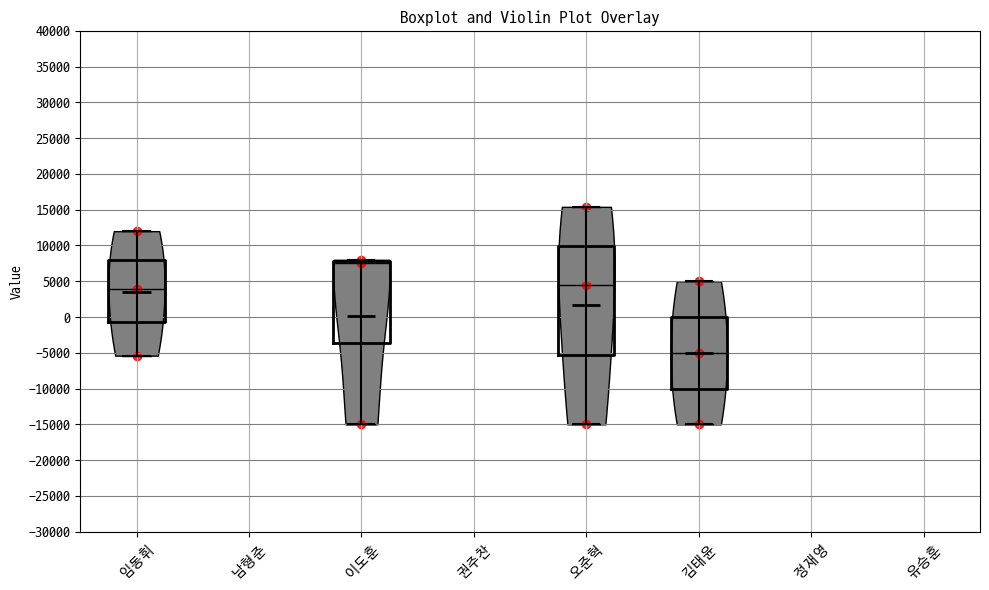

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))



# Create violin plot for non-NaN values in each column
for i, col in enumerate(poker_df.columns, start=1):
    data = poker_df[col].dropna()
    if not data.empty:
        # Violin plot
        parts = plt.violinplot(dataset=[data], positions=[i], showmeans=True, showmedians=False)
        
        # Scatter points
        x = [i] * len(data)
        plt.scatter(x, data, color='red', alpha=0.8)

        # Customize violin plot parts to highlight mean and median
        for pc in parts['bodies']:
            pc.set_facecolor('gray')  # Change violin color
            pc.set_edgecolor('black')
            pc.set_alpha(1)

        # Customize mean marker
        parts['cmeans'].set_color('black')
        parts['cmeans'].set_linewidth(2)
        parts['cbars'].set_edgecolor('black')
        parts['cmaxes'].set_edgecolor('black')
        parts['cmins'].set_edgecolor('black')
        parts['cmeans'].set_edgecolor('black')
        
# Boxplot with customized line width and median/box color
poker_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'),
                 boxprops=dict(linewidth=2),
                 whiskerprops=dict(linewidth=0),)

plt.title('Boxplot and Violin Plot Overlay')
plt.ylabel('Value')
plt.xticks(ticks=range(1, len(poker_df.columns) + 1), labels=poker_df.columns, rotation=45)
plt.yticks(range(-30000, 40001, 5000))
plt.grid(axis='y', color='gray', linestyle='-')
plt.tight_layout()
